# Ukázkový notebook k Isingově modelu

In [1]:
include("ising.jl")
using .Ising

In [3]:
import PyPlot # Případně změňte, využito k ilustraci anti/feromagnetismu.

In [4]:
"""
Vypočítá střední hodnoty magnetizace ve čtvercích zadaného rozměru.
"""
function average(data, stride=6)
    h, w = size(data)
    averaged = zeros(h - stride, w - stride)
    
    for j in 1:h-stride
        for k in 1:w-stride
            averaged[j, k] = sum(data[j:j+stride, k:k+stride]) / (stride + 1)^2
        end
    end
    
    return averaged
end

average

## 1. Periodické hraniční podmínky

Feromagnetismus, symetrická interakce, nízká teplota a nulové vnější magnetické pole

In [5]:
model = IsingPeriodic(500, 500, β=6)
randomize!(model)

Bílá v obrázku níže odpovídá spinu `+1` a černá `-1`.

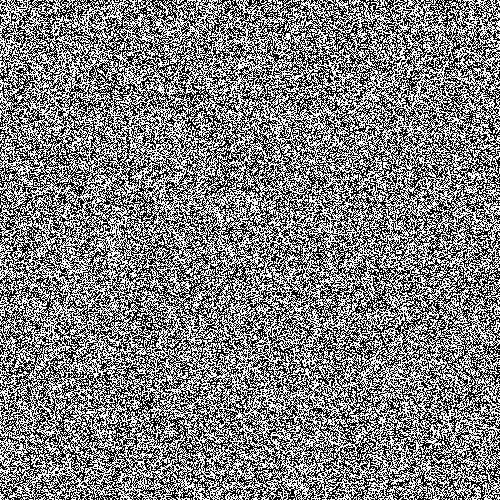

In [6]:
plot(model)

Necháme systém vyvíjet milion kroků.

In [7]:
evolve!(model, 1_000_000)

A vykreslíme výsledek, vidíme vznik oblastí, kde jsou spiny orientovány stejným směrem.

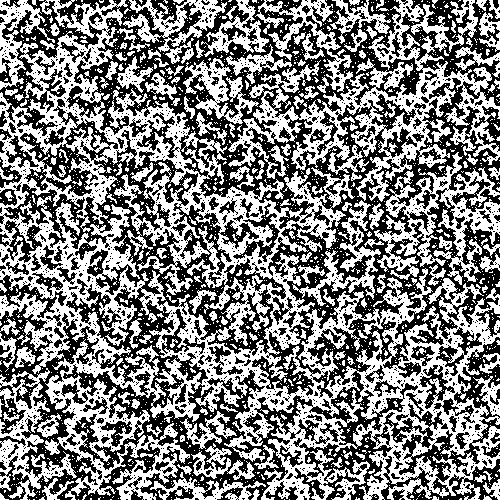

In [8]:
plot(model)

Když se podíváme na střední hodnoty magnetizace v malých oblastech, tak vidíme výrazné kousky s průměrnou magentizací $+1$ i $-1$.

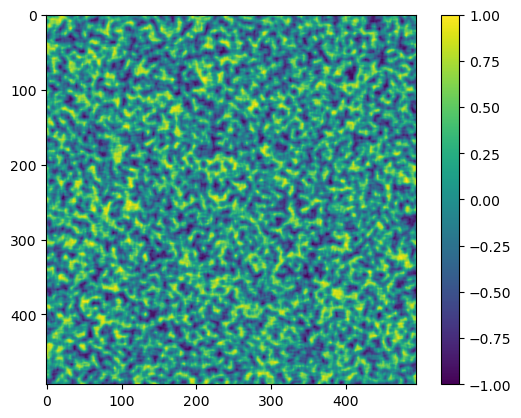

PyObject <matplotlib.colorbar.Colorbar object at 0x7f14a74a63b0>

In [9]:
fig = PyPlot.figure()
p = PyPlot.imshow(average(model.sites), vmin=-1.0, vmax=1.0)
fig.colorbar(p)

## 2. Periodické hraniční podmínky

Feromagnetismus, symetrická interakce, vysoká teplota a nulové vnější magnetické pole

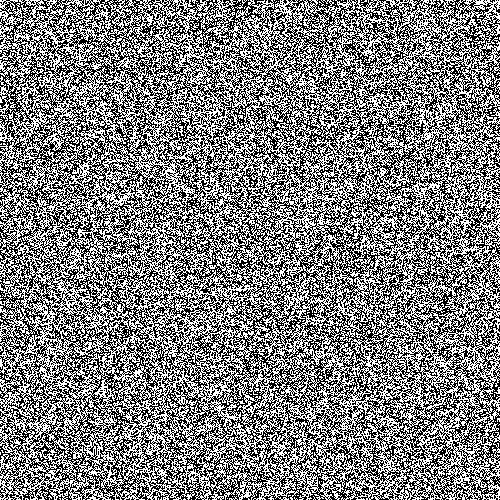

In [10]:
model = IsingPeriodic(500, 500, β=0.06)
randomize!(model)
plot(model)

Nechme systém opět vyvíjet.

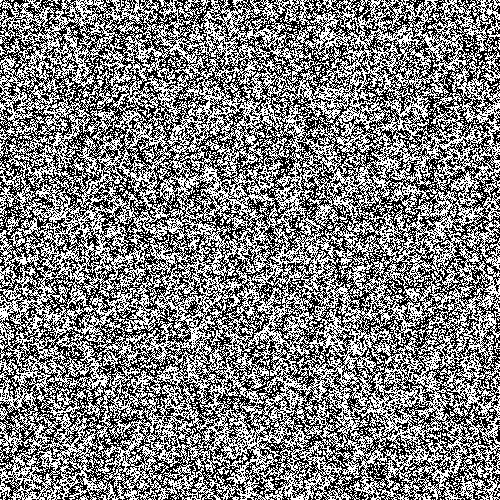

In [11]:
evolve!(model, 1_000_000)
plot(model)

Stále vypadá chaoticky, dalších milion kroků.

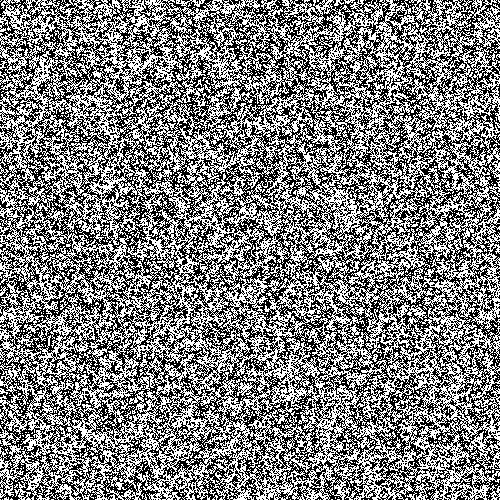

In [12]:
evolve!(model, 1_000_000)
plot(model)

Vidíme, že s vysokou teplotou (malou β) nedojde k magnetizaci, systém zůstává v chaotickém módu. Existuje jistá velmi zajímavá hodnota parametru β, při které se toto chování láme. Tomuto efektu se říká **fázový přechod**. Isingův model je právě jeden z nejjednodušších fyzikálních modelů, který tento jev umožňuje modelovat.

## 3. Periodické hraniční podmínky

Feromagnetismus, symetrická interakce, nízká teplota a vnější magnetické pole působící na jedné straně mřížky.

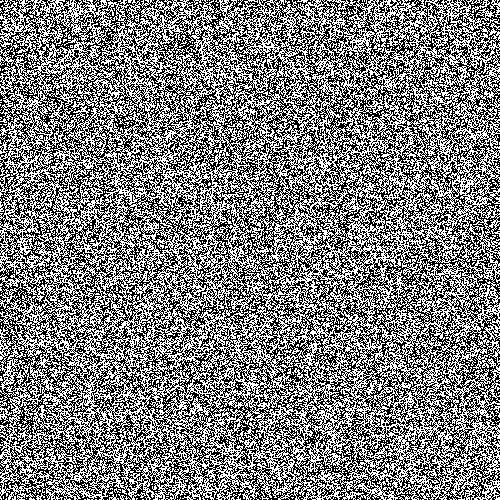

In [13]:
model = IsingPeriodic(500, 500, β=8, h=hcat(zeros(500, 250), ones(500, 250)))
randomize!(model)
plot(model)

Na počátku vliv vnějšího pole samozřejmě není vidět. Ale po pár iteracích...

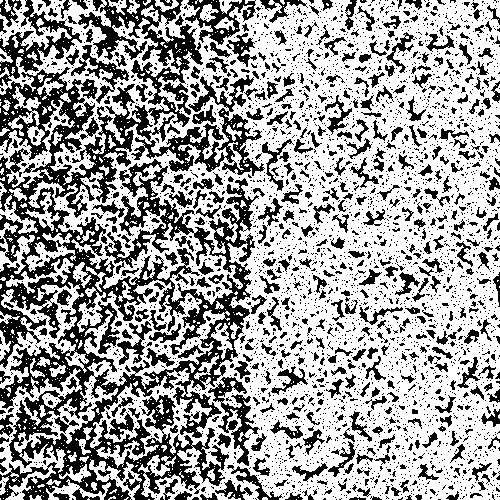

In [14]:
evolve!(model, 1_000_000)
plot(model)

## 4. Periodické hraniční podmínky

Anti-feromagnetismus, symetrická interakce, nízká teplota a vnější magnetické pole působící na jedné straně mřížky.

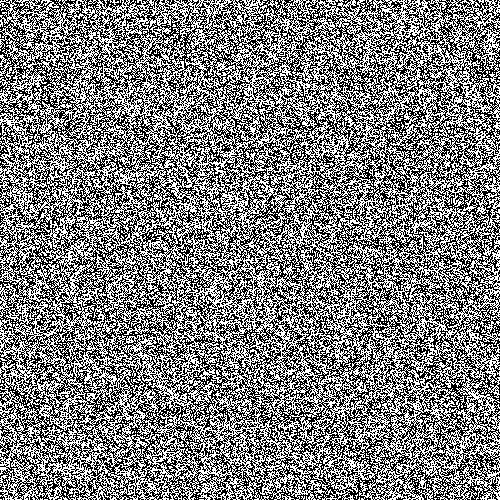

In [15]:
model = IsingPeriodic(500, 500, -ones(3, 3), β=8, h=hcat(zeros(500, 250), ones(500, 250)))
randomize!(model)
plot(model)

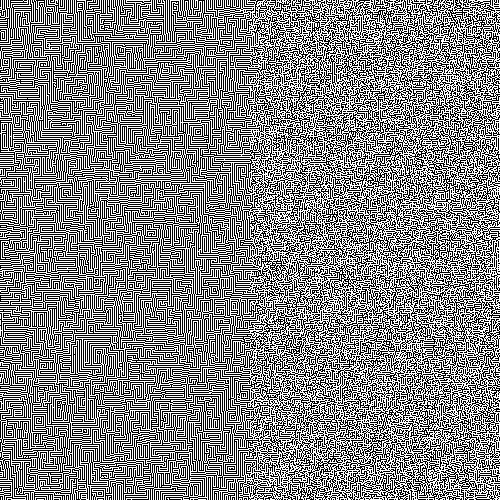

In [16]:
evolve!(model, 1_000_000)
plot(model)

Nyní nedošlo ke vzniku oblastí s ostrou magnetizací. To je názorně vidět i ve středních hodnotách magnetizace.

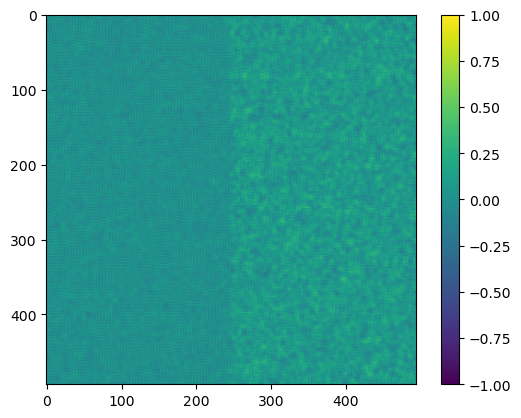

PyObject <matplotlib.colorbar.Colorbar object at 0x7f149b080cd0>

In [17]:
fig = PyPlot.figure()
p = PyPlot.imshow(average(model.sites), vmin=-1.0, vmax=1.0)
fig.colorbar(p)

## 5. Pevné hraniční podmínky

Feromagnetismus, nesymetrická interakce, nízká teplota a nulové vnější pole.

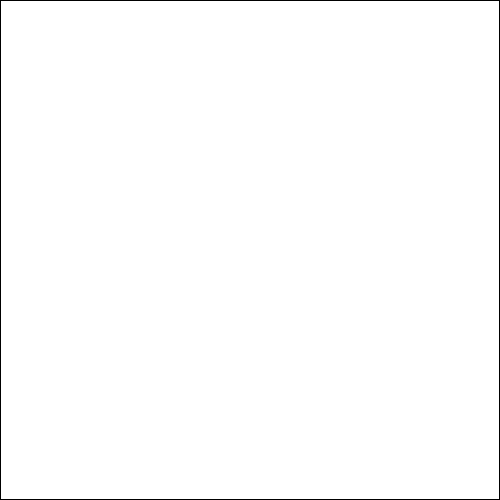

In [18]:
sites = -ones(500, 500)
sites[2:499, 2:499] = ones(498, 498)
J = [0. 1. 0.; 4. 0. 4.; 0. 1. 0.]

model = IsingFixed(sites, J, β=4)
plot(model)

In [19]:
randomize!(model)
evolve!(model, 1_000_000)

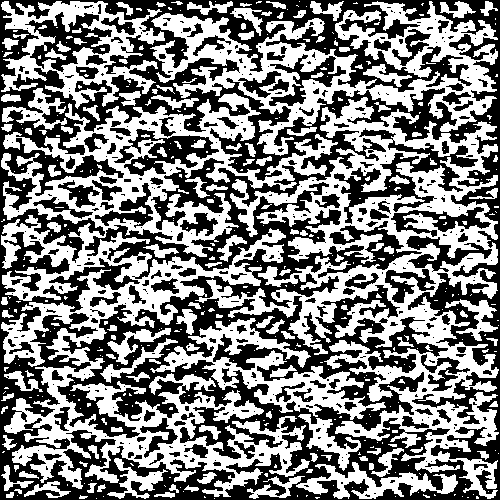

In [20]:
plot(model)

## 6. Pevné hraniční podmínky

Anti-feromagnetismus, nesymetrická interakce, nízká teplota a vnější F-pole.

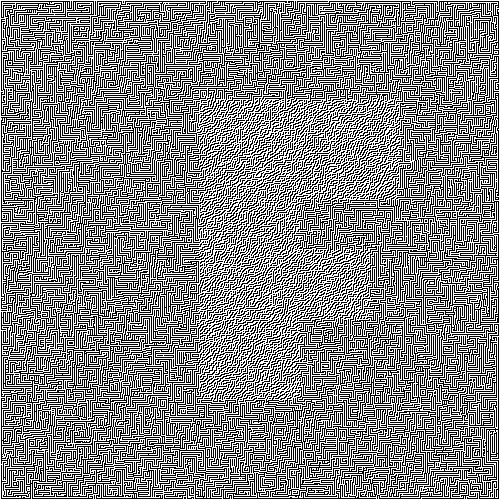

In [21]:
J = [-10. 0. -1; 0. 0. 0.; -1. 0. -10.]
h = zeros(500, 500)
h[100:400, 200:300] = 5*ones(301, 101)
h[100:200, 300:400] = 5*ones(101, 101)
h[250:320, 300:370] = 5*ones(71, 71)

model = IsingFixed(ones(500, 500), J, β=2, h=h)
randomize!(model)

evolve!(model, 1_000_000)
plot(model)

## 7. Pevné hraniční podmínky

Feromagnetismus, nesymetrická interakce, nízká teplota a oscilující vnější pole.

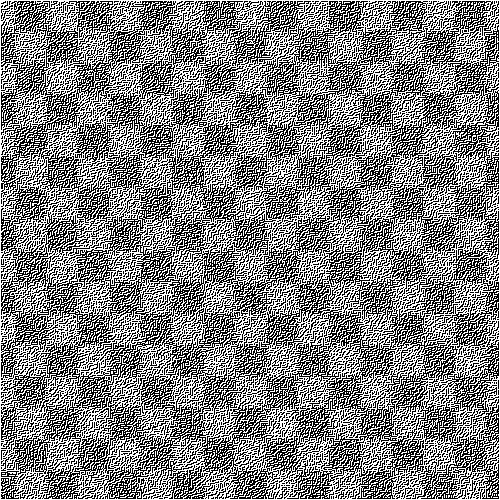

In [29]:
J = [-10. 0. -1; 0. 0. 0.; -1. 0. -10.]
h = [ 20*sin(j/10)*cos(k/10) for j=1:500, k=1:500]

model = IsingFixed(ones(500, 500), J, β=2, h=h)
randomize!(model)

evolve!(model, 1_000_000)
plot(model)

# 8. ...